### Import libraries 

In [1]:
#per creare rete
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}


Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
m = SocialDB(100)
m.df

,class
id,
903423,nocare
304157,nocare
714792,nocare
926389,pax
967649,proukr
...,...
375902,pax
789101,proukr
485377,nocare


In [3]:
m.edges

[{'id': 931076, 'from': 144110, 'to': 931087},
 {'id': 883757, 'from': 375902, 'to': 907274},
 {'id': 460398, 'from': 594745, 'to': 375902},
 {'id': 756686, 'from': 100927, 'to': 400630},
 {'id': 273161, 'from': 903423, 'to': 436912},
 {'id': 334283, 'from': 545576, 'to': 909283},
 {'id': 498920, 'from': 401585, 'to': 956370},
 {'id': 991020, 'from': 516949, 'to': 299535},
 {'id': 227409, 'from': 970850, 'to': 121876},
 {'id': 387098, 'from': 590266, 'to': 902859},
 {'id': 123051, 'from': 115352, 'to': 795007},
 {'id': 390304, 'from': 791289, 'to': 166651},
 {'id': 136683, 'from': 354553, 'to': 799309},
 {'id': 236289, 'from': 354553, 'to': 485377},
 {'id': 974330, 'from': 902159, 'to': 585543},
 {'id': 914161, 'from': 485377, 'to': 795007},
 {'id': 974695, 'from': 246445, 'to': 907274},
 {'id': 642653, 'from': 363772, 'to': 791289},
 {'id': 444788, 'from': 977378, 'to': 278845},
 {'id': 561961, 'from': 956370, 'to': 793484},
 {'id': 240718, 'from': 375902, 'to': 422735},
 {'id': 43455

In [4]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, stand=m.df["class"])

In [5]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (144110, 931087),
    (375902, 907274),
    (594745, 375902),
    (100927, 400630),
    (903423, 436912),
    (545576, 909283),
    (401585, 956370),
    (516949, 299535),
    (970850, 121876),
    (590266, 902859),
    (115352, 795007),
    (791289, 166651),
    (354553, 799309),
    (354553, 485377),
    (902159, 585543),
    (485377, 795007),
    (246445, 907274),
    (363772, 791289),
    (977378, 278845),
    (956370, 793484),
    (375902, 422735),
    (837393, 437583),
    (176496, 714535),
    (538250, 246445),
    (116625, 825362),
    (319857, 973021),
    (789101, 152176),
    (144110, 558341),
    (437583, 319857),
    (907274, 278845),
    (793484, 795007),
    (935832, 973021),
    (926389, 931087),
    (436912, 364832),
    (860004, 901625),
    (585543, 241010),
    (945146, 992765),
    (611043, 784805),
    (910354, 789101),
    (369786, 516949),
    (722431, 860004),
    (809981, 675247),
    (553929, 319857),
    (907274, 653352),
    (791289, 653352),
    (100927, 103058),
    (909283, 558341),
    (968637, 437583),
    (304157, 809981),
    (488411, 611043),
    (100927, 278845),
    (859222, 624323),
    (594745, 488411),
    (645505, 278845),
    (970850, 152176),
    (714792, 757779),
    (436912, 166651),
    (902859, 901625),
    (144110, 485377),
    (542140, 793484),
    (152179, 967649),
    (837393, 970850),
    (675247, 714792),
    (977378, 722431),
    (551475, 629315),
    (992765, 516949),
    (757779, 375902),
    (629315, 551475),
    (590065, 907274),
    (639301, 611043),
    (375902, 116625),
    (629315, 860004),
    (375902, 784805),
    (369786, 977378),
    (354553, 799309),
    (825362, 400630),
    (422735, 973021),
    (752240, 653352),
    (879396, 516949),
    (714535, 436912),
    (942609, 799309),
    (933061, 152176),
    (711383, 355127),
    (859222, 144110),
    (304157, 789101),
    (152176, 977378),
    (483015, 189857),
    (166651, 712201),
    (363772, 629315),
    (538250, 553929),
    (799309, 903423),
    (624323, 859222),
    (553929, 176496),
    (992765, 278845),
    (752240, 401585),
    (483015, 907274),
    (590065, 516949),
    (542140, 793484),
    (251816, 241010),
    (942609, 901625),
    (909283, 956370),
    (246445, 232361),
    (902159, 152179),
    (711383, 742159),
    (545576, 369786),
    (363772, 907274),
    (903423, 926389),
    (675247, 639301),
    (412575, 901625),
    (516949, 355127),
    (902859, 538250),
    (594745, 278845),
    (152179, 714535),
    (793484, 778400),
    (483015, 784805),
    (166651, 241010),
    (103058, 926389),
    (585543, 675247),
    (639301, 645505),
    (789101, 714535),
    (369786, 907274),
    (342958, 558341),
    (115352, 278845),
    (799309, 176496),
    (611043, 545576),
    (784805, 902159),
    (115352, 585543),
    (878691, 712201),
    (837393, 590065),
    (485377, 422735),
    (992765, 585543),
    (354553, 757779),
    (166651, 722431),
    (711383, 645505),
    (968637, 967649),
    (585543, 799309),
    (436912, 542140),
    (992765, 375902),
    (251816, 860004),
    (611043, 901625),
    (176496, 970850),
    (629315, 436912),
    (926389, 538250),
    (909283, 956370),
    (590266, 795007),
    (825362, 354553),
    (968637, 437583),
    (278845, 931087),
    (166651, 793484),
    (611043, 401585),
    (100927, 789101),
    (879396, 973021),
    (152179, 645505),
    (992765, 278845),
    (422735, 375902),
    (121876, 596610),
    (970850, 115352),
    (100927, 354553),
    (246445, 907274),
    (246445, 545576),
    (624323, 795007),
    (437583, 977378),
    (354553, 791289),
    (103058, 437583),
    (645505, 902859),
    (945146, 103058),
    (488411, 967649),
    (246445, 992765),
    (189857, 144110),
    (585543, 901625),
    (363772, 933061),
    (516949, 714535),
    (784805, 115352),
    (926389, 304157),
    (675247, 860004),
    (144110, 653352),
    (590065, 789101),
    (596610, 115352),
    (115352, 121876),
    (100927, 935832),
    (795007, 590065),
    (910354, 103

In [6]:
G.add_edges_from(edges)

In [7]:
G.number_of_edges()

285

In [8]:
G.number_of_nodes()

100

In [10]:
G.remove_nodes_from(list(nx.isolates(G)))

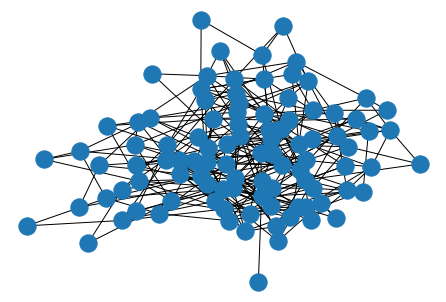

In [11]:
nx.draw(G)

# Community discovery algorithms

# Label Propagation

In [12]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [13]:
label_prop.communities

[[485377,
  712201,
  907274,
  299535,
  902159,
  942609,
  825362,
  910354,
  121876,
  757779,
  304157,
  714792,
  653352,
  551475,
  256569,
  100927,
  629315,
  799309,
  859222,
  375902,
  970850,
  878691,
  789101,
  152176,
  752240,
  152179,
  369786,
  596610,
  538250,
  808075,
  103058,
  115352,
  778400,
  246445,
  436912,
  401585,
  926389,
  624323,
  933061,
  483015,
  902859,
  809981,
  711383,
  634585,
  973021,
  611043,
  144110,
  590065,
  400630,
  354553,
  791289,
  166651,
  363772,
  903423,
  558341,
  931087,
  742159,
  837393,
  364832,
  879396,
  714535,
  545576,
  355127,
  594745,
  278845,
  639301,
  585543,
  422735,
  437583,
  516949,
  860004,
  176496,
  319857,
  241010,
  795007,
  645505,
  793484,
  116625,
  935832,
  412575,
  189857,
  784805,
  251816,
  232361,
  342958,
  675247,
  590266,
  542140,
  968637,
  553929,
  956370,
  488411,
  967649,
  977378,
  909283,
  901625,
  945146,
  992765,
  722431]]

In [14]:
label_prop.overlap

False

In [15]:
label_prop.node_coverage

1.0

In [16]:
label_prop.to_json()

'{"communities": [[485377, 712201, 907274, 299535, 902159, 942609, 825362, 910354, 121876, 757779, 304157, 714792, 653352, 551475, 256569, 100927, 629315, 799309, 859222, 375902, 970850, 878691, 789101, 152176, 752240, 152179, 369786, 596610, 538250, 808075, 103058, 115352, 778400, 246445, 436912, 401585, 926389, 624323, 933061, 483015, 902859, 809981, 711383, 634585, 973021, 611043, 144110, 590065, 400630, 354553, 791289, 166651, 363772, 903423, 558341, 931087, 742159, 837393, 364832, 879396, 714535, 545576, 355127, 594745, 278845, 639301, 585543, 422735, 437583, 516949, 860004, 176496, 319857, 241010, 795007, 645505, 793484, 116625, 935832, 412575, 189857, 784805, 251816, 232361, 342958, 675247, 590266, 542140, 968637, 553929, 956370, 488411, 967649, 977378, 909283, 901625, 945146, 992765, 722431]], "algorithm": "Label Propagation", "params": {"": ""}, "overlap": false, "coverage": 1.0}'

### Evaluation

In [17]:
label_prop.average_internal_degree()

FitnessResult(min=5.757575757575758, max=5.757575757575758, score=5.757575757575758, std=0.0)

In [18]:
label_prop.average_internal_degree(summary=False)

[5.757575757575758]

# Louvain 

In [19]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [20]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [21]:
#Identify clusters
louvain.communities 

[[903423,
  304157,
  926389,
  945146,
  319857,
  144110,
  931087,
  553929,
  910354,
  437583,
  189857,
  837393,
  103058,
  241010,
  436912,
  299535,
  542140,
  538250,
  714535,
  789101,
  485377],
 [714792,
  342958,
  825362,
  711383,
  354553,
  400630,
  116625,
  859222,
  795007,
  675247,
  516949,
  757779,
  590065,
  742159,
  624323,
  639301,
  590266,
  100927,
  355127],
 [121876,
  935832,
  115352,
  879396,
  585543,
  809981,
  942609,
  176496,
  970850,
  973021,
  596610,
  799309,
  901625,
  784805,
  902159,
  611043],
 [166651,
  793484,
  152176,
  977378,
  902859,
  956370,
  878691,
  401585,
  778400,
  712201,
  369786,
  722431],
 [909283, 422735, 232361, 256569, 246445, 545576, 251816, 860004, 558341],
 [278845, 808075, 992765, 488411, 594745, 907274, 364832, 375902, 483015],
 [363772, 629315, 551475, 933061, 653352, 634585, 752240, 791289],
 [967649, 152179, 412575, 968637, 645505]]

In [22]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [23]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [24]:
#json representation of the results
louvain.to_json()

'{"communities": [[903423, 304157, 926389, 945146, 319857, 144110, 931087, 553929, 910354, 437583, 189857, 837393, 103058, 241010, 436912, 299535, 542140, 538250, 714535, 789101, 485377], [714792, 342958, 825362, 711383, 354553, 400630, 116625, 859222, 795007, 675247, 516949, 757779, 590065, 742159, 624323, 639301, 590266, 100927, 355127], [121876, 935832, 115352, 879396, 585543, 809981, 942609, 176496, 970850, 973021, 596610, 799309, 901625, 784805, 902159, 611043], [166651, 793484, 152176, 977378, 902859, 956370, 878691, 401585, 778400, 712201, 369786, 722431], [909283, 422735, 232361, 256569, 246445, 545576, 251816, 860004, 558341], [278845, 808075, 992765, 488411, 594745, 907274, 364832, 375902, 483015], [363772, 629315, 551475, 933061, 653352, 634585, 752240, 791289], [967649, 152179, 412575, 968637, 645505]], "algorithm": "Leiden", "params": {"initial_membership": null, "weights": null}, "overlap": false, "coverage": 1.0}'

### Evaluation

In [25]:
#community AID
louvain.average_internal_degree()

FitnessResult(min=2.0, max=3.7142857142857144, score=2.7960656850459484, std=0.5951246966116387)

In [26]:
louvain.average_internal_degree(summary=False)

[3.7142857142857144,
 3.473684210526316,
 3.375,
 2.6666666666666665,
 2.4444444444444446,
 2.4444444444444446,
 2.25,
 2.0]

In [27]:
#comminity AID at library level(vedere documentazione:https://cdlib.readthedocs.io/en/latest/reference/evaluation.html)
evaluation.average_internal_degree(G, louvain)

FitnessResult(min=2.0, max=3.7142857142857144, score=2.7960656850459484, std=0.5951246966116387)

# Angel 

In [28]:
angel= algorithms.angel(G, threshold=0.25)#min_com_size=3

In [29]:
angel.method_parameters

{'threshold': 0.25, 'min_community_size': 3}

In [30]:
angel.communities

[[639301, 675247, 714792, 757779],
 [115352, 121876, 596610, 970850],
 [354553, 485377, 795007, 825362],
 [299535, 437583, 553929]]

In [31]:
angel.overlap

True

In [32]:
angel.node_coverage

0.15151515151515152

In [33]:
angel.to_json()

'{"communities": [[639301, 675247, 714792, 757779], [115352, 121876, 596610, 970850], [354553, 485377, 795007, 825362], [299535, 437583, 553929]], "algorithm": "ANGEL", "params": {"threshold": 0.25, "min_community_size": 3}, "overlap": true, "coverage": 0.15151515151515152}'

### Evaluation

In [34]:
angel.average_internal_degree()

FitnessResult(min=1.3333333333333333, max=2.5, score=2.2083333333333335, std=0.5051814855409226)

In [35]:
angel.average_internal_degree(summary=False)

[2.5, 2.5, 2.5, 1.3333333333333333]

In [36]:
#comminity AID at library level(vedere documentazione:https://cdlib.readthedocs.io/en/latest/reference/evaluation.html)
evaluation.average_internal_degree(G, angel)

FitnessResult(min=1.3333333333333333, max=2.5, score=2.2083333333333335, std=0.5051814855409226)

# Clustering Evaluation (Comparison)

In [37]:
louvain.normalized_mutual_information(label_prop)

MatchingResult(score=0.0, std=None)

In [38]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.0, std=None)

# Community Visualization

In [39]:
pos = nx.spring_layout(G)

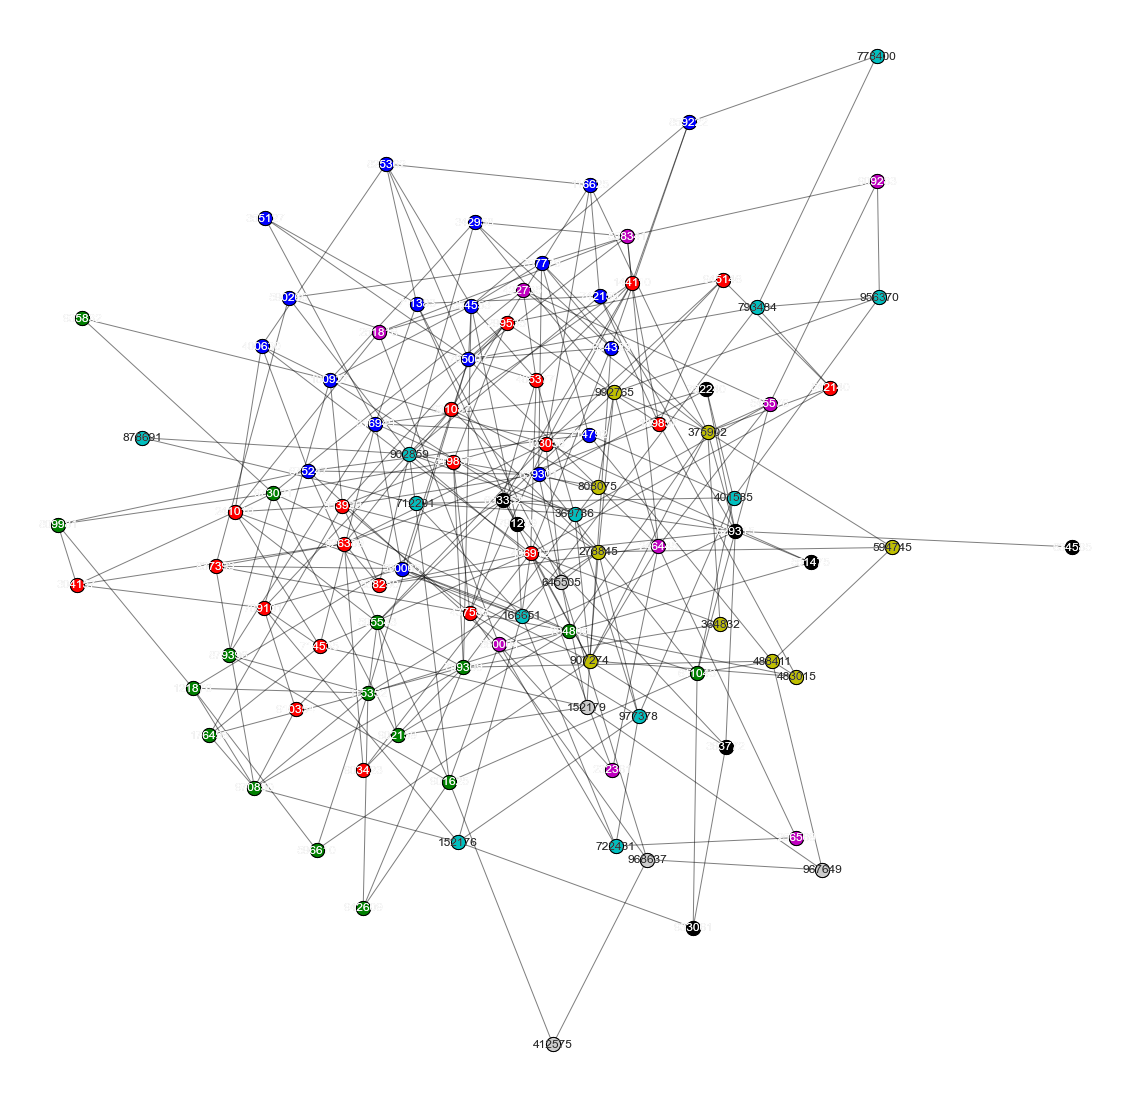

In [40]:
viz.plot_network_clusters(G, louvain, pos, figsize=(20, 20), plot_labels=True)

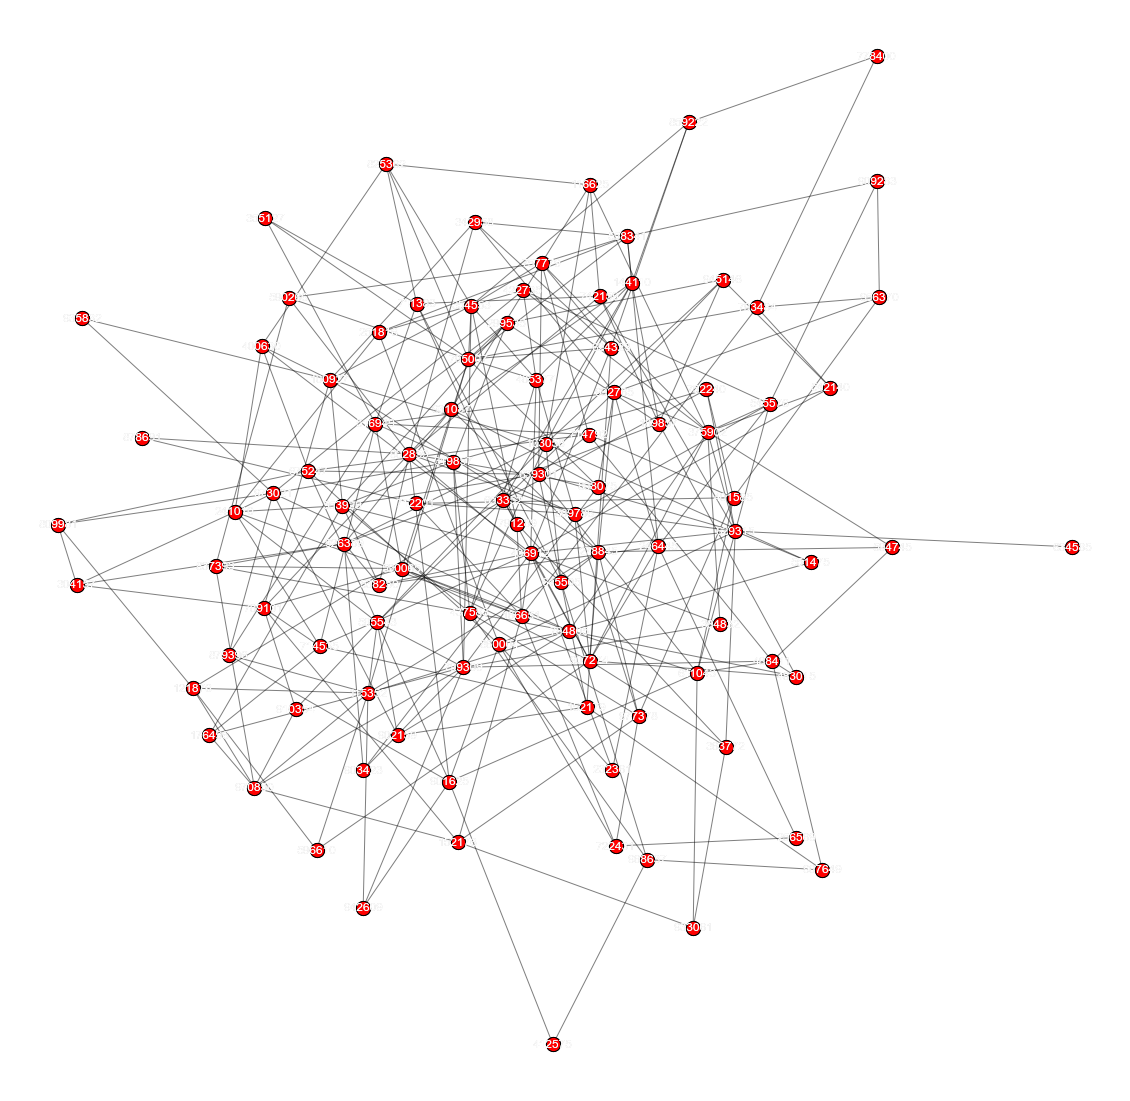

In [41]:
viz.plot_network_clusters(G, label_prop, pos, figsize=(20, 20), plot_labels=True)

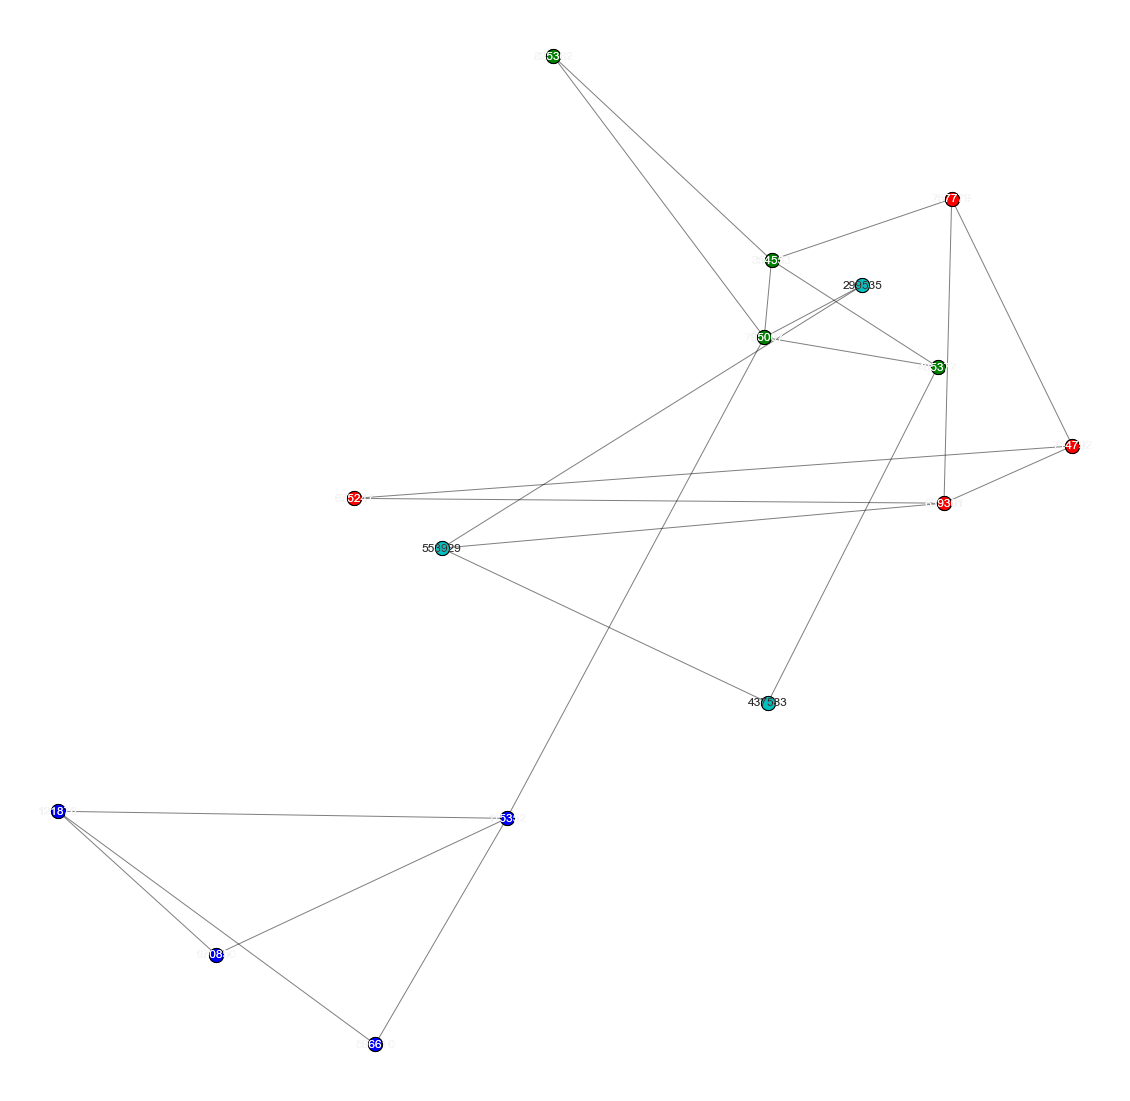

In [42]:
viz.plot_network_clusters(G, angel, pos, figsize=(20, 20), plot_labels=True)

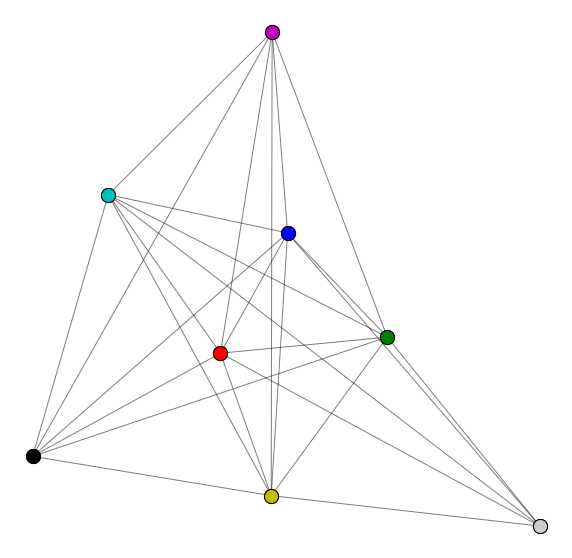

In [43]:
viz.plot_community_graph(G, louvain, figsize=(10, 10))

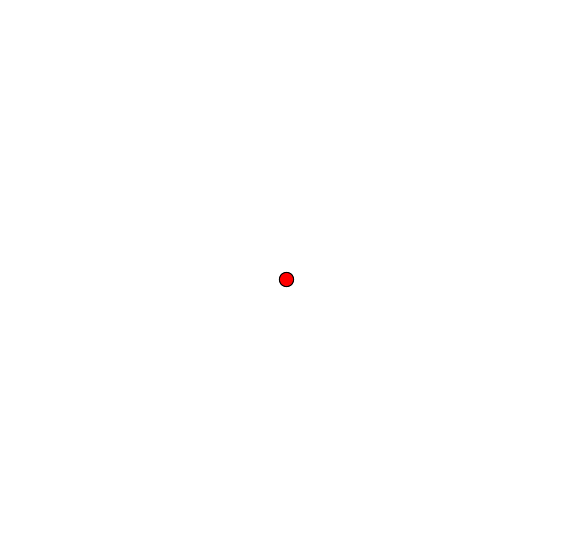

In [44]:
viz.plot_community_graph(G, label_prop, figsize=(10, 10))

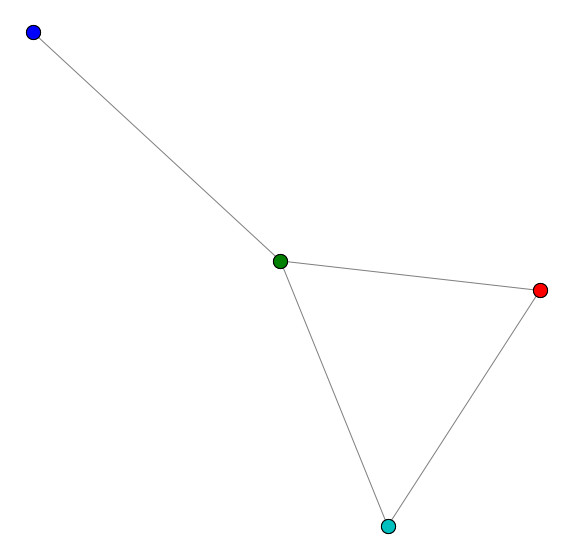

In [45]:
viz.plot_community_graph(G, angel, figsize=(10, 10))

# Community fitness/comparison visualization

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

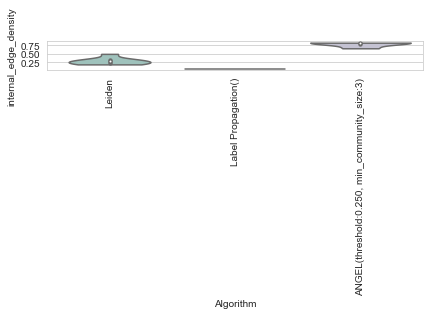

In [46]:
viz.plot_com_stat([louvain, label_prop, angel], evaluation.internal_edge_density)

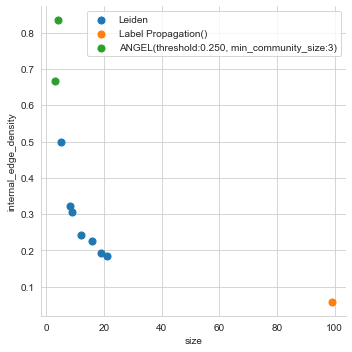

In [47]:
viz.plot_com_properties_relation([louvain, label_prop, angel], evaluation.size, evaluation.internal_edge_density)

### Qualitative evaluation: da rivedere

## Ground Truth evaluation

<AxesSubplot:xlabel='graph', ylabel='score'>

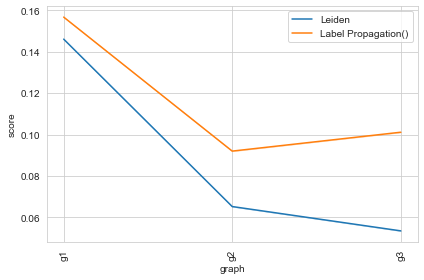

In [76]:
g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for G in graphs:
    ground_truth = NodeClustering(communities={frozenset(G.nodes[v]['community']) for v in G}, graph=G, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

In [77]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
infomap_coms = algorithms.infomap(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms, infomap_coms],evaluation.adjusted_mutual_information)

ModuleNotFoundError: Optional dependency not satisfied: install package wurlitzer to use infomap.